In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("H1N1_Flu_Vaccines.csv")

In [5]:
df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [6]:
df.tail(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird,0,1
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [7]:
df.shape

(26707, 38)

In [8]:
df.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [11]:
df.describe(include="all")

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


# Univariate

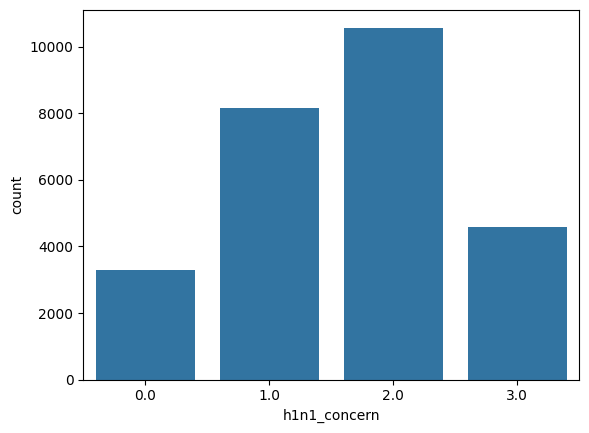

In [12]:
sns.countplot(x="h1n1_concern",data=df)
plt.show()

<Axes: xlabel='h1n1_knowledge', ylabel='count'>

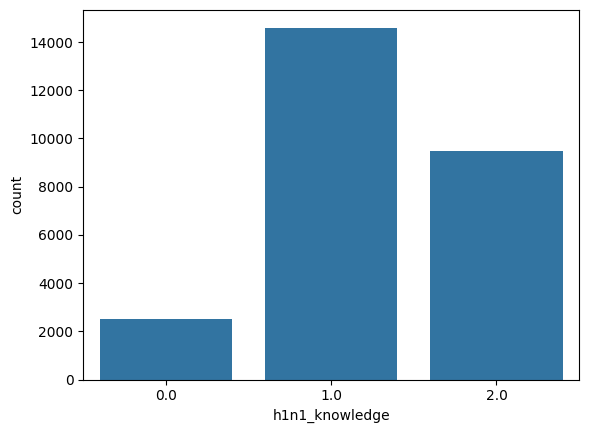

In [13]:
sns.countplot(x="h1n1_knowledge",data=df)

<Axes: xlabel='marital_status', ylabel='count'>

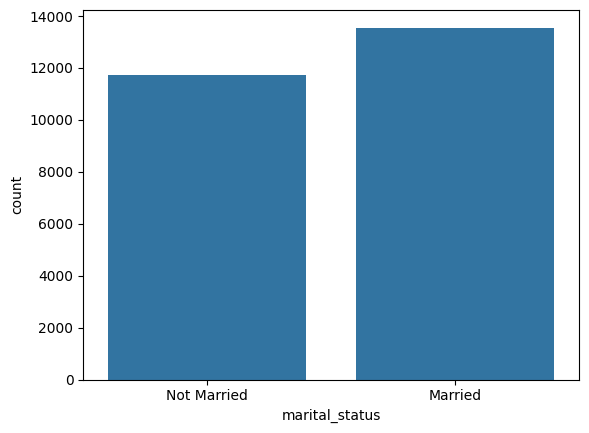

In [14]:
sns.countplot(x="marital_status",data=df)


<Axes: xlabel='employment_status', ylabel='count'>

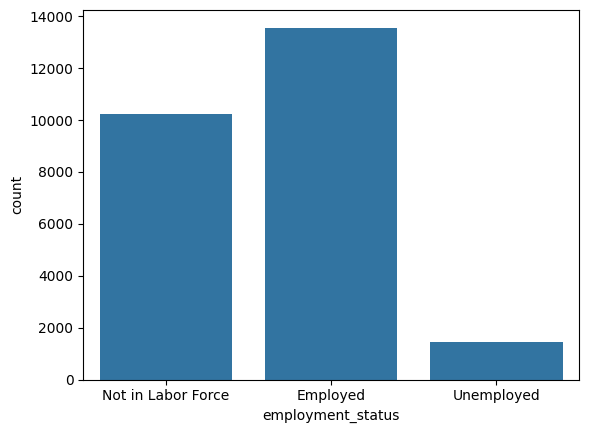

In [15]:
sns.countplot(x="employment_status",data=df)

<Axes: xlabel='education', ylabel='count'>

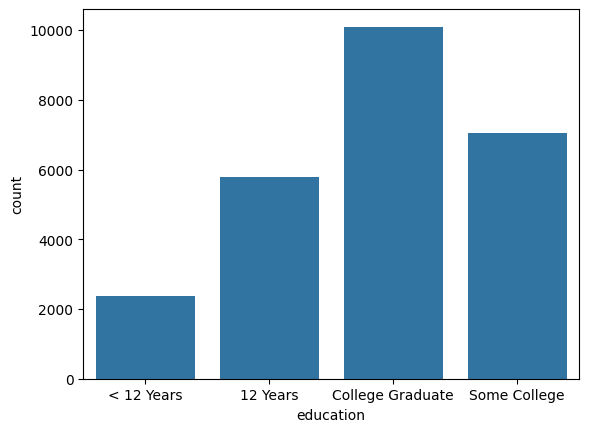

In [16]:
sns.countplot(x="education",data=df)

<Axes: xlabel='household_children', ylabel='count'>

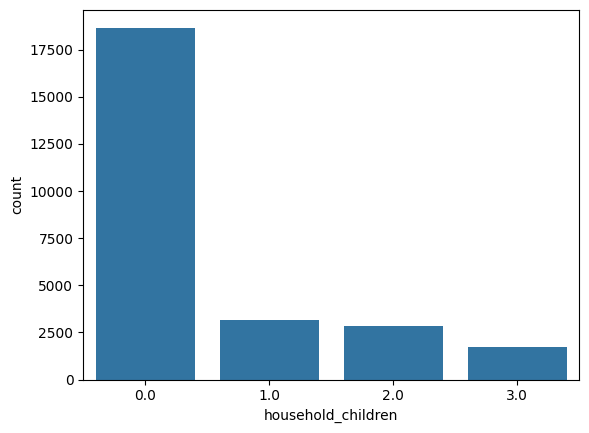

In [17]:
sns.countplot(x="household_children",data=df)

<Axes: xlabel='household_adults', ylabel='count'>

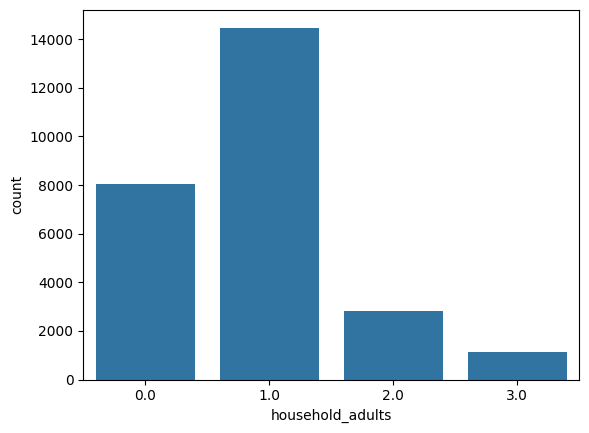

In [18]:

sns.countplot(x="household_adults",data=df)

<Axes: xlabel='behavioral_avoidance', ylabel='count'>

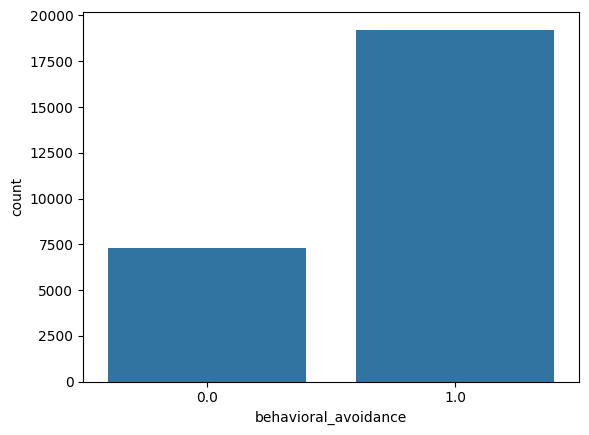

In [19]:
sns.countplot(x="behavioral_avoidance",data=df)

<Axes: xlabel='behavioral_large_gatherings', ylabel='count'>

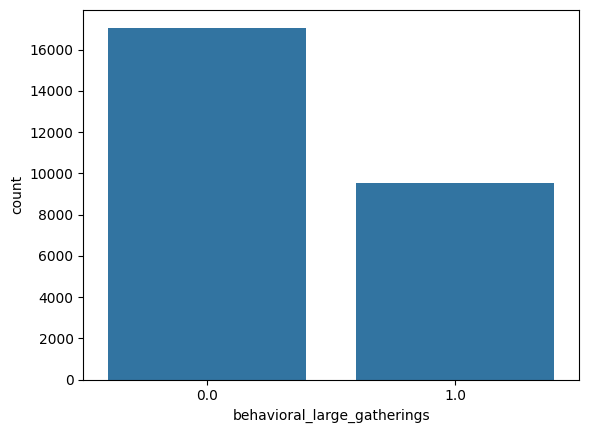

In [20]:
sns.countplot(x="behavioral_large_gatherings",data=df)

(array([ 3296.,     0.,     0.,  8153.,     0.,     0., 10575.,     0.,
            0.,  4591.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

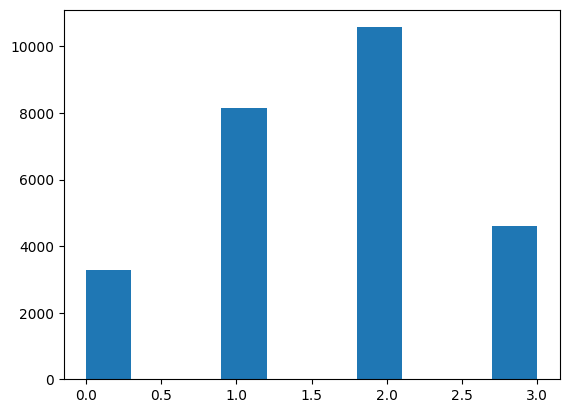

In [21]:
plt.hist("h1n1_concern",data=df)

(array([ 2506.,     0.,     0.,     0.,     0., 14598.,     0.,     0.,
            0.,  9487.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

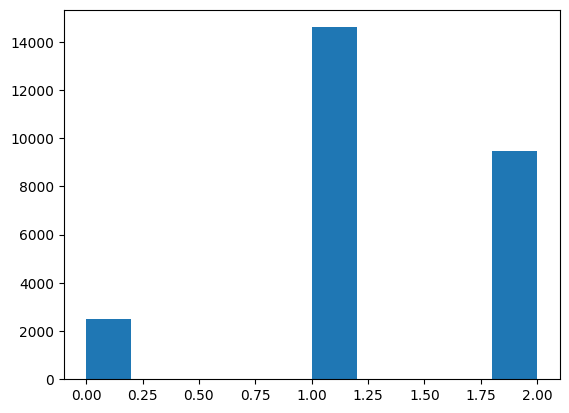

In [22]:
plt.hist("h1n1_knowledge",data=df)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

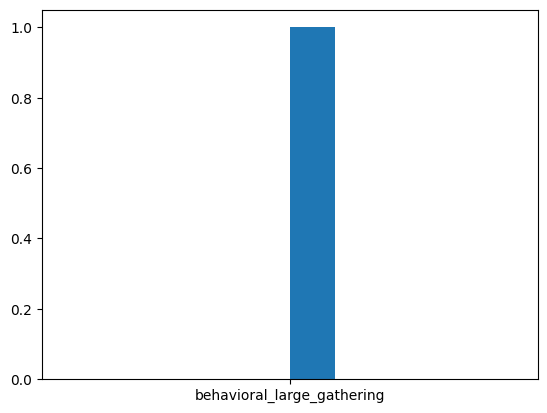

In [23]:
plt.hist("behavioral_large_gathering",data=df)

(array([ 8056.,     0.,     0., 14474.,     0.,     0.,  2803.,     0.,
            0.,  1125.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

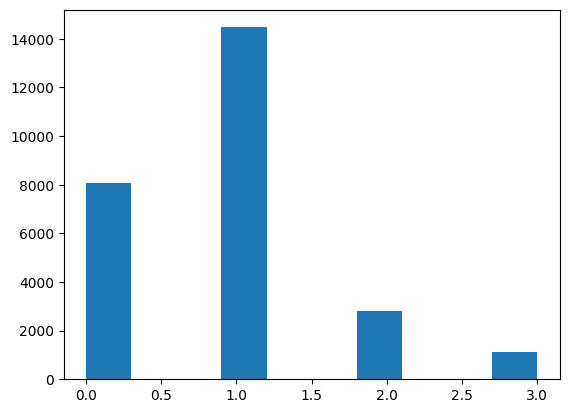

In [24]:
plt.hist("household_adults",data=df)

(array([18672.,     0.,     0.,  3175.,     0.,     0.,  2864.,     0.,
            0.,  1747.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

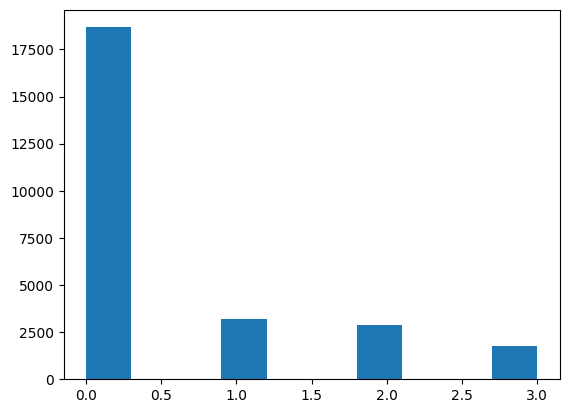

In [25]:
plt.hist("household_children",data=df)

(array([17073.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9547.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

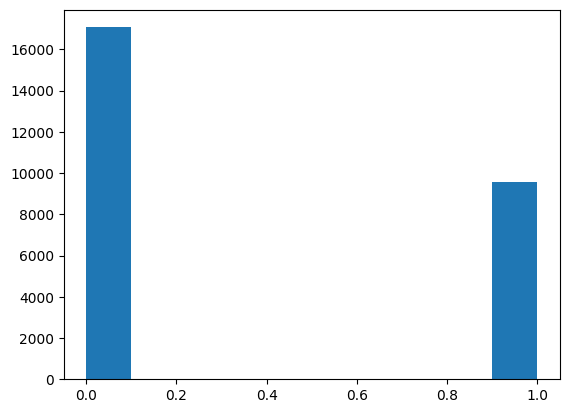

In [26]:
plt.hist("behavioral_large_gatherings",data=df)

(array([ 7271.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

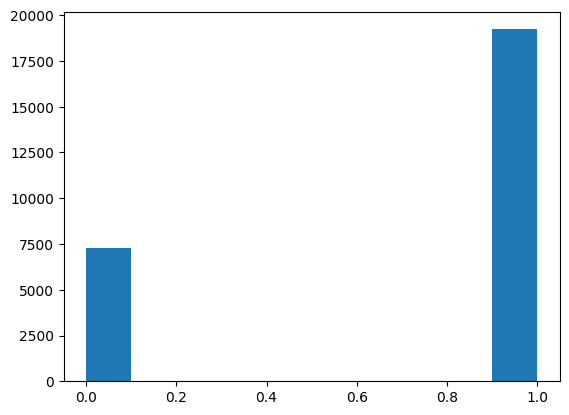

In [27]:
plt.hist("behavioral_avoidance",data=df)

<Axes: xlabel='h1n1_concern'>

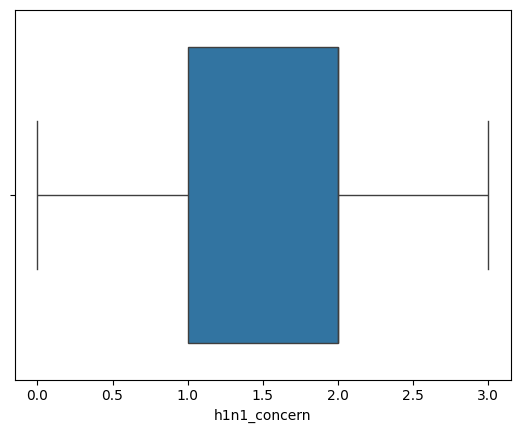

In [28]:
sns.boxplot(x="h1n1_concern",data=df)

<Axes: xlabel='h1n1_knowledge'>

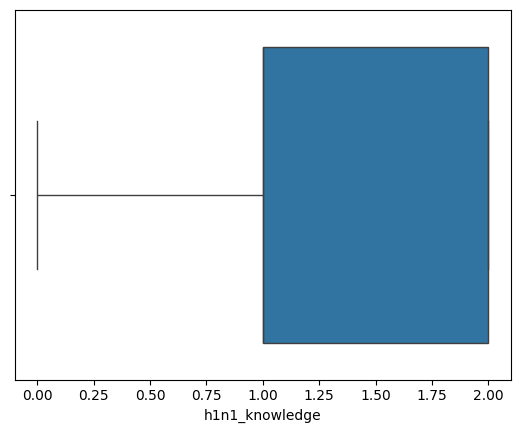

In [29]:
sns.boxplot(x="h1n1_knowledge",data=df)

<Axes: xlabel='household_adults'>

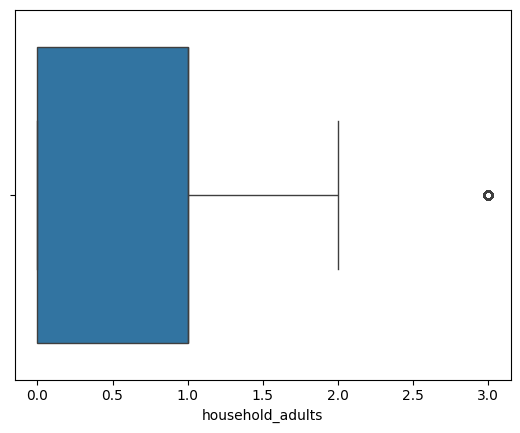

In [30]:
sns.boxplot(x="household_adults",data=df)

<Axes: xlabel='household_children'>

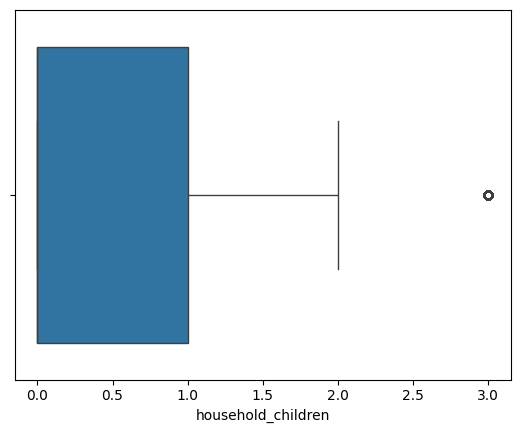

In [31]:
sns.boxplot(x="household_children",data=df)

<Axes: xlabel='behavioral_avoidance'>

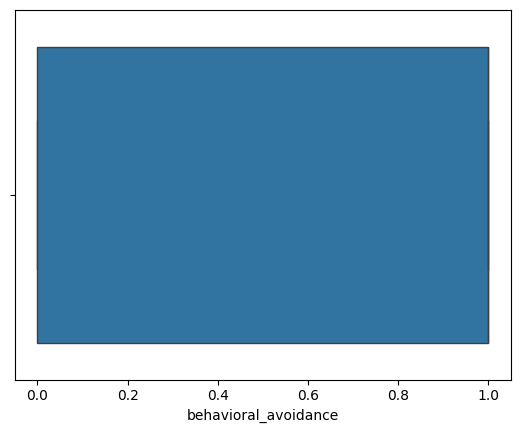

In [32]:
sns.boxplot(x="behavioral_avoidance",data=df)

<Axes: xlabel='behavioral_large_gatherings'>

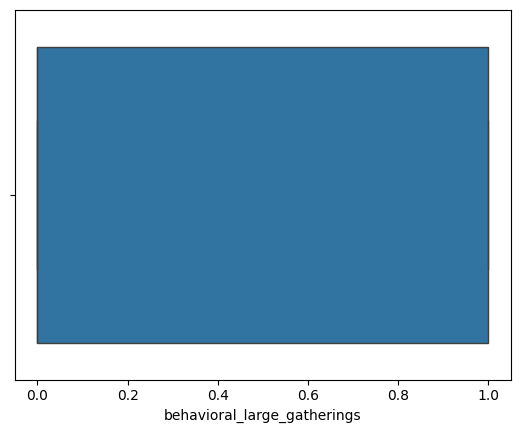

In [33]:
sns.boxplot(x="behavioral_large_gatherings",data=df)

# Removing Outliers

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_adults,uppno_of_adults=remove_outlier(df['household_adults'])
df['household_adults']=np.where(df['household_adults']>uppno_of_adults,uppno_of_adults,df['household_adults'])
df['household_adults']=np.where(df['household_adults']<lowno_of_adults,lowno_of_adults,df['household_adults'])

<Axes: xlabel='household_adults'>

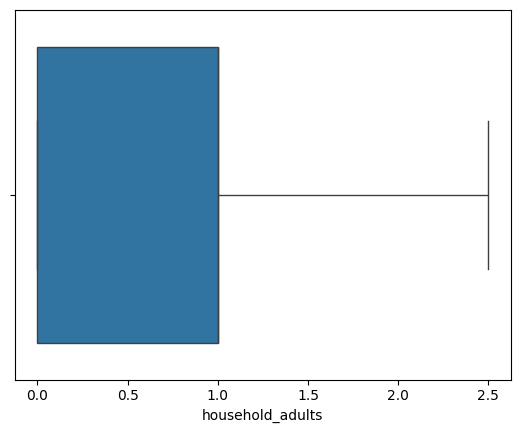

In [35]:
sns.boxplot(x="household_adults",data=df)


In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_children,uppno_of_children=remove_outlier(df['household_children'])
df['household_children']=np.where(df['household_children']>uppno_of_children,uppno_of_children,df['household_children'])
df['household_children']=np.where(df['household_children']<lowno_of_children,lowno_of_children,df['household_children'])

<Axes: xlabel='household_children'>

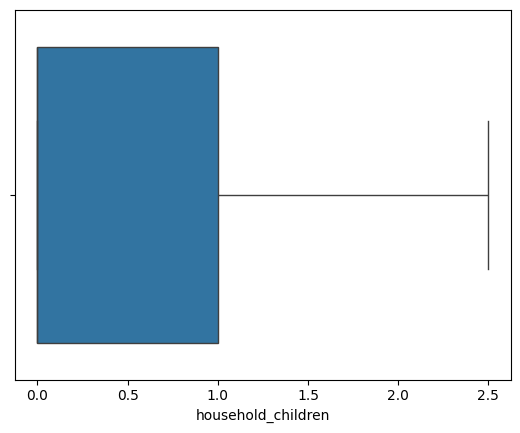

In [37]:
sns.boxplot(x="household_children",data=df)

In [38]:
# sns.pairplot(df)

# BiVariate

<Axes: xlabel='household_children', ylabel='count'>

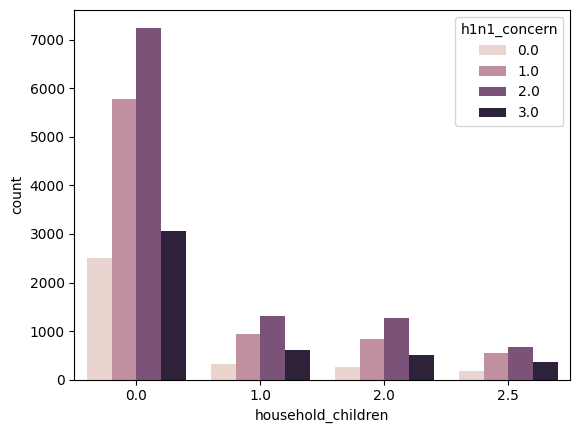

In [39]:
sns.countplot(x="household_children",hue="h1n1_concern",data=df)

<Axes: xlabel='household_children', ylabel='count'>

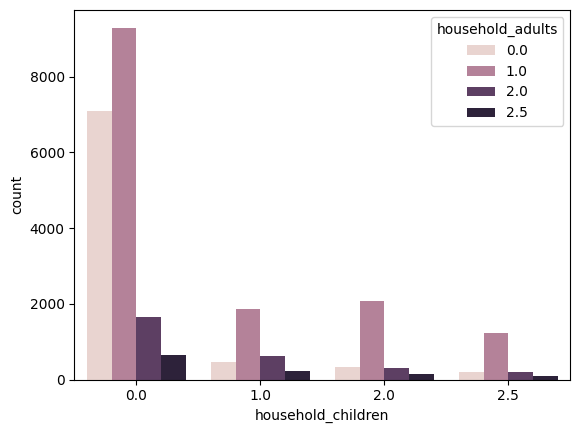

In [40]:
sns.countplot(x="household_children",hue="household_adults",data=df)

<Axes: xlabel='h1n1_knowledge', ylabel='count'>

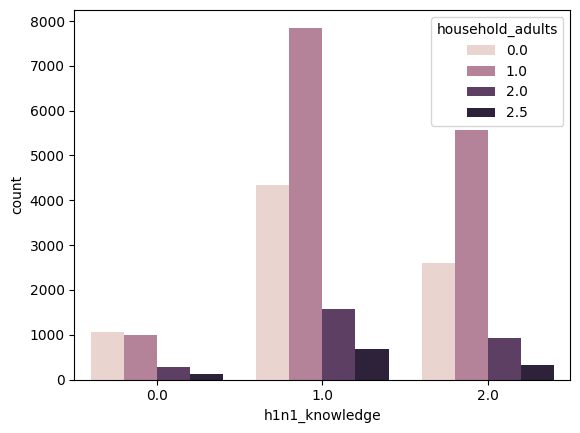

In [41]:
sns.countplot(x="h1n1_knowledge",hue="household_adults",data=df)

<Axes: xlabel='h1n1_knowledge', ylabel='count'>

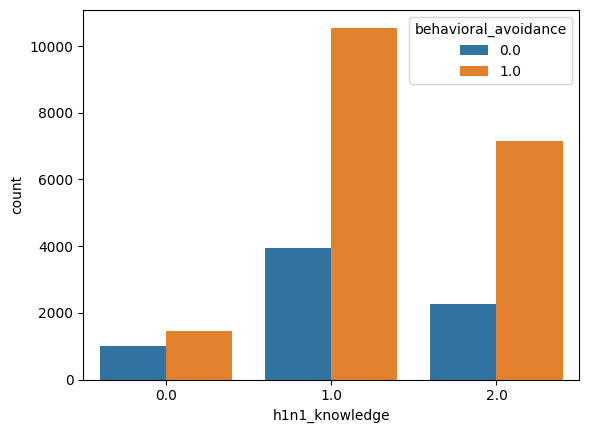

In [42]:
sns.countplot(x="h1n1_knowledge",hue="behavioral_avoidance",data=df)

<Axes: xlabel='behavioral_avoidance', ylabel='count'>

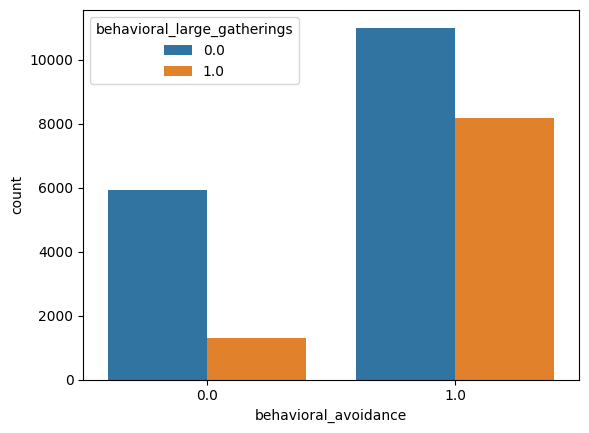

In [43]:
sns.countplot(x="behavioral_avoidance",hue="behavioral_large_gatherings",data=df)

<Axes: xlabel='behavioral_large_gatherings', ylabel='count'>

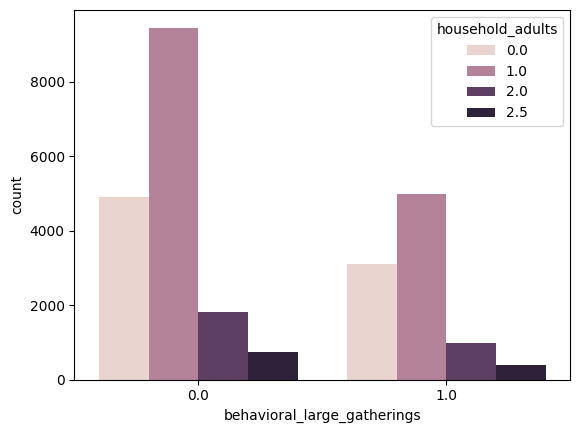

In [44]:
sns.countplot(x="behavioral_large_gatherings",hue="household_adults",data=df)

<Axes: xlabel='behavioral_large_gatherings', ylabel='count'>

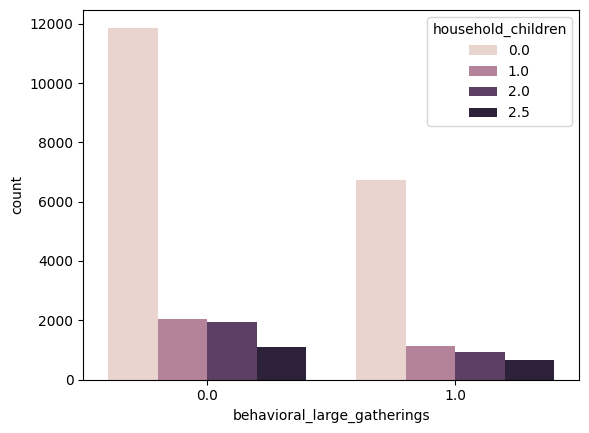

In [45]:
sns.countplot(x="behavioral_large_gatherings",hue="household_children",data=df)

<Axes: xlabel='h1n1_concern', ylabel='count'>

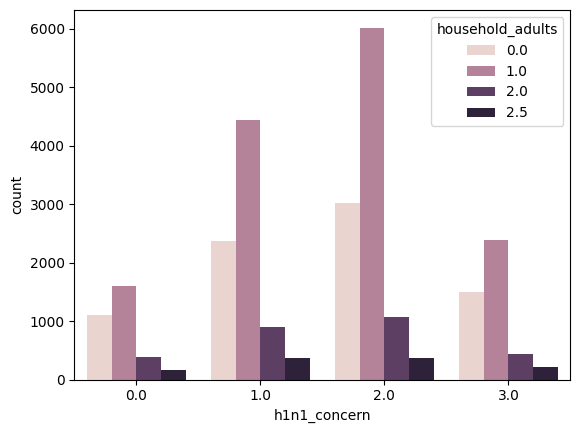

In [46]:
sns.countplot(x="h1n1_concern",hue="household_adults",data=df)

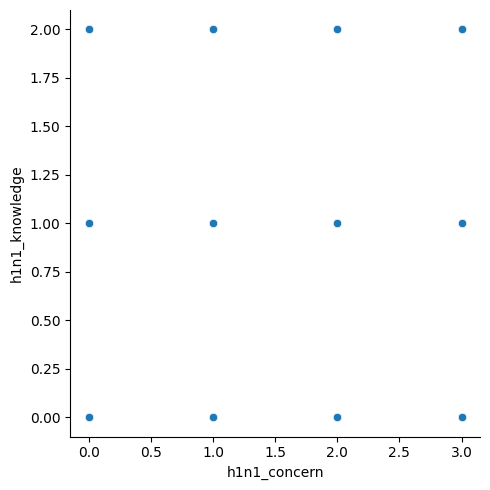

In [47]:
sns.relplot(x="h1n1_concern",y="h1n1_knowledge",data=df)

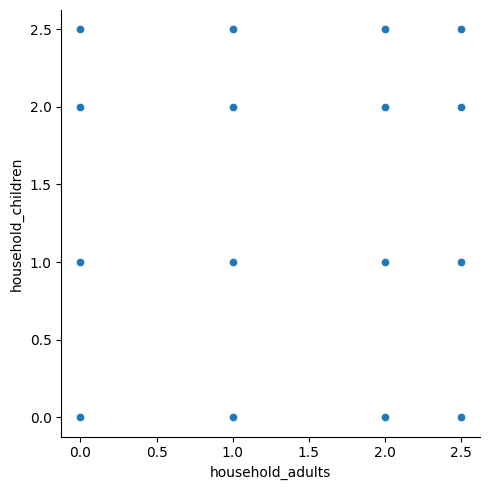

In [48]:
sns.relplot(x="household_adults",y="household_children",data=df)

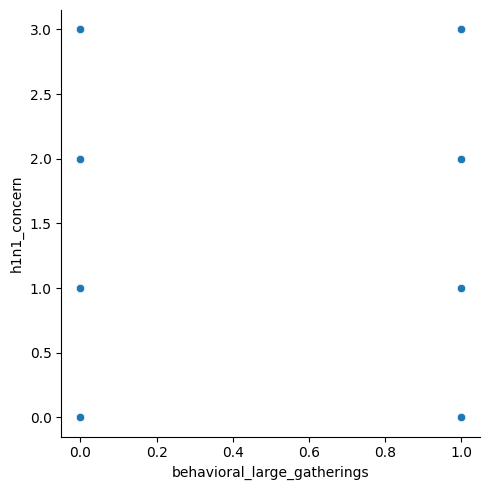

In [49]:
sns.relplot(x="behavioral_large_gatherings",y="h1n1_concern",data=df)

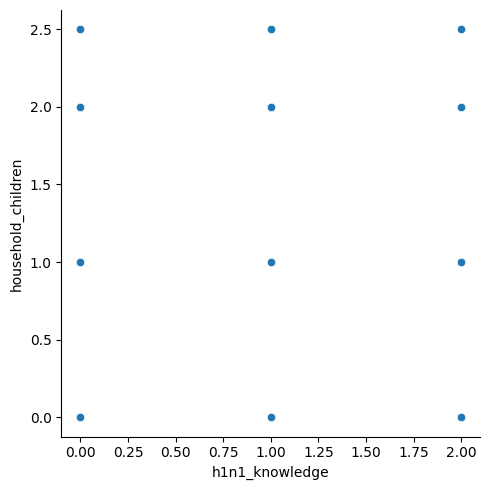

In [50]:
sns.relplot(x="h1n1_knowledge",y="household_children",data=df)

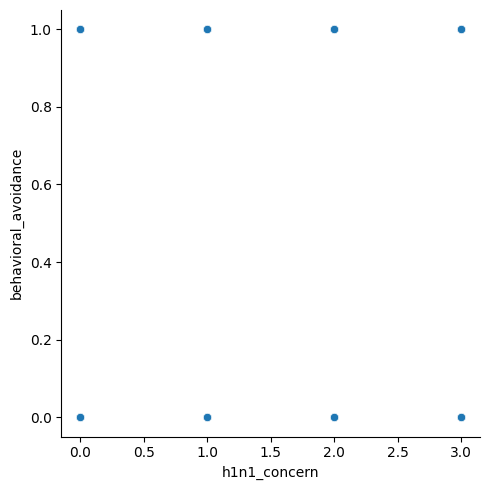

In [51]:
sns.relplot(x="h1n1_concern",y="behavioral_avoidance",data=df)

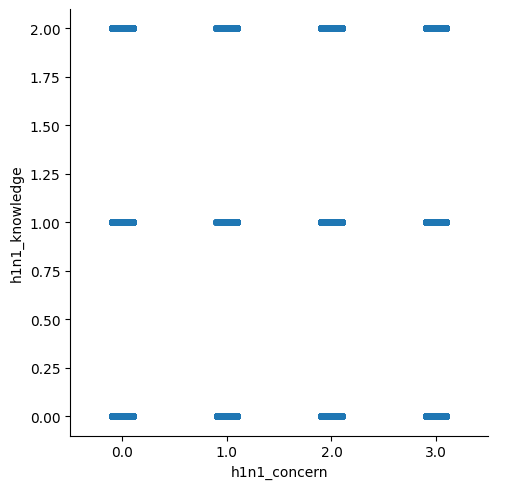

In [52]:
sns.catplot(x="h1n1_concern",y="h1n1_knowledge",data=df)

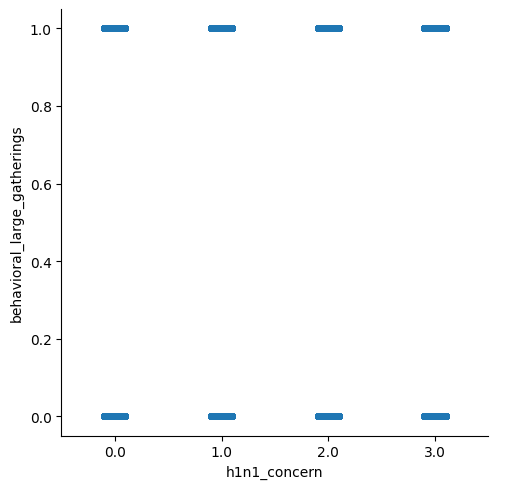

In [53]:
sns.catplot(x="h1n1_concern",y="behavioral_large_gatherings",data=df)

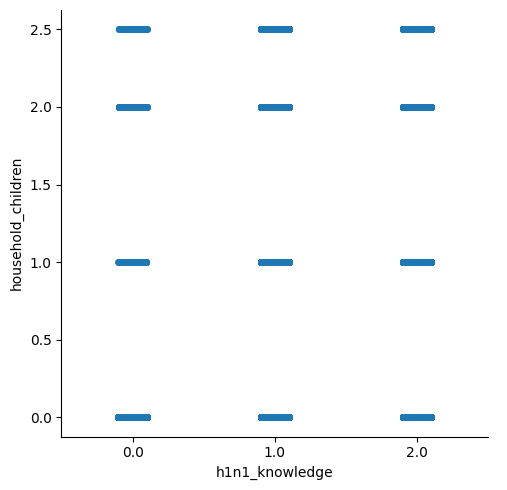

In [54]:
sns.catplot(x="h1n1_knowledge",y="household_children",data=df)

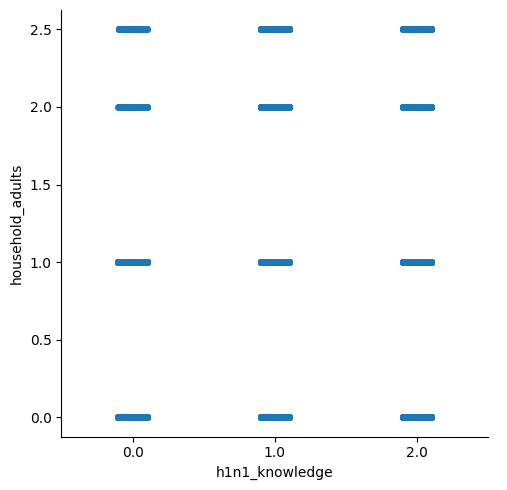

In [55]:
sns.catplot(x="h1n1_knowledge",y="household_adults",data=df)

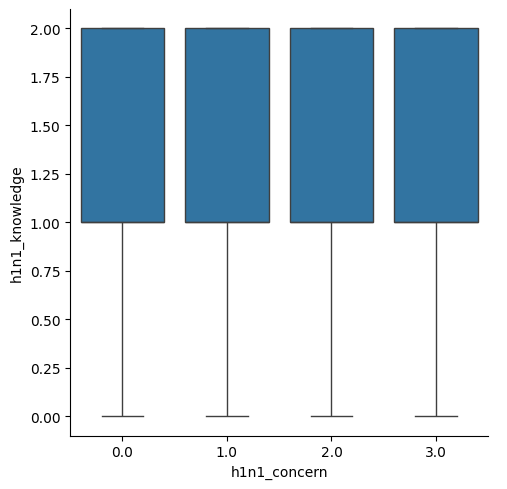

In [56]:
sns.catplot(x="h1n1_concern",y="h1n1_knowledge",data=df,kind="box")

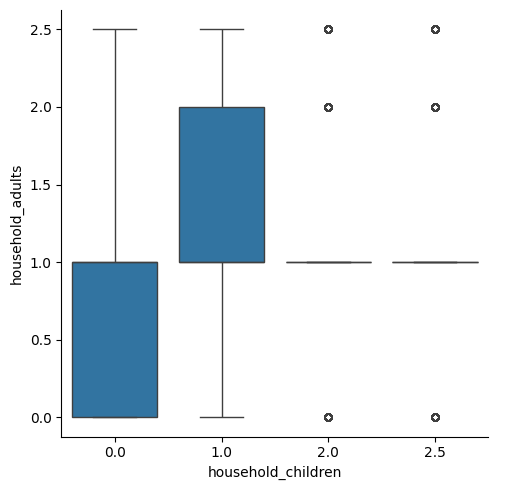

In [57]:
sns.catplot(x="household_children",y="household_adults",data=df,kind="box")

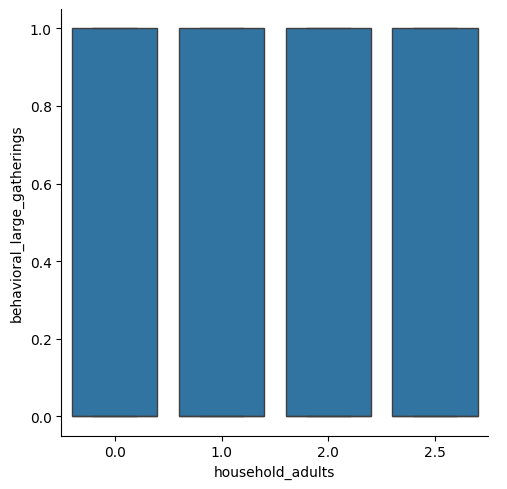

In [58]:
sns.catplot(x="household_adults",y="behavioral_large_gatherings",data=df,kind="box")

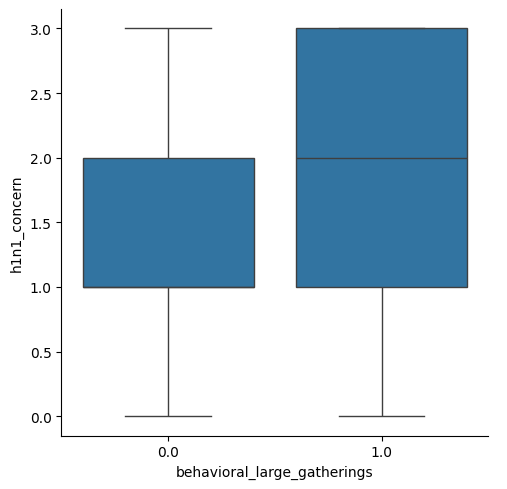

In [59]:
sns.catplot(x="behavioral_large_gatherings",y="h1n1_concern",data=df,kind="box")

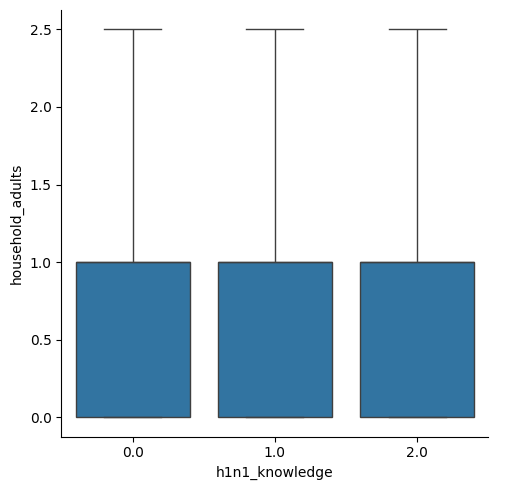

In [60]:
sns.catplot(x="h1n1_knowledge",y="household_adults",data=df,kind="box")

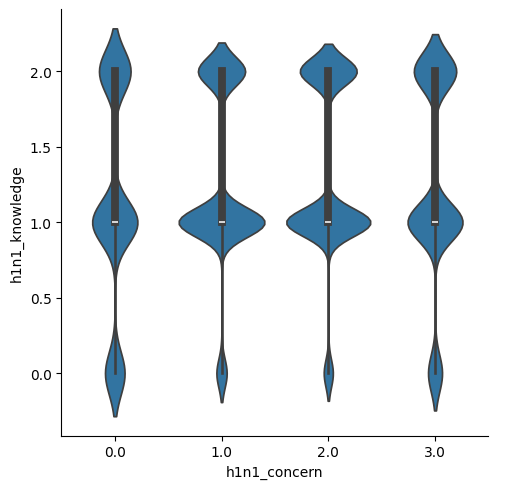

In [61]:
sns.catplot(x="h1n1_concern",y="h1n1_knowledge",data=df,kind="violin")

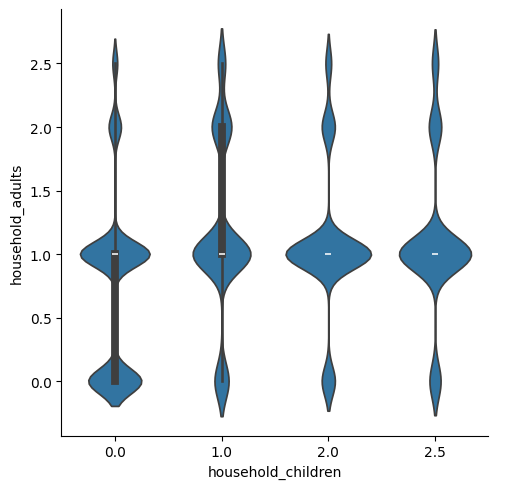

In [62]:
sns.catplot(x="household_children",y="household_adults",data=df,kind="violin")

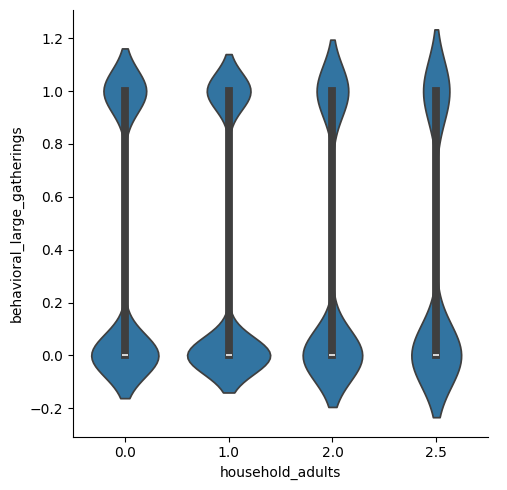

In [63]:
sns.catplot(x="household_adults",y="behavioral_large_gatherings",data=df,kind="violin")

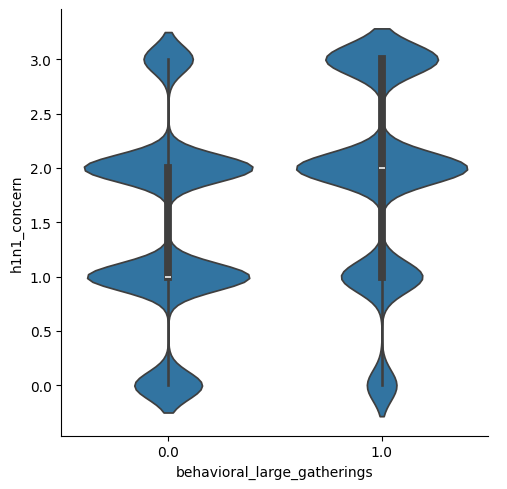

In [64]:
sns.catplot(x="behavioral_large_gatherings",y="h1n1_concern",data=df,kind="violin")

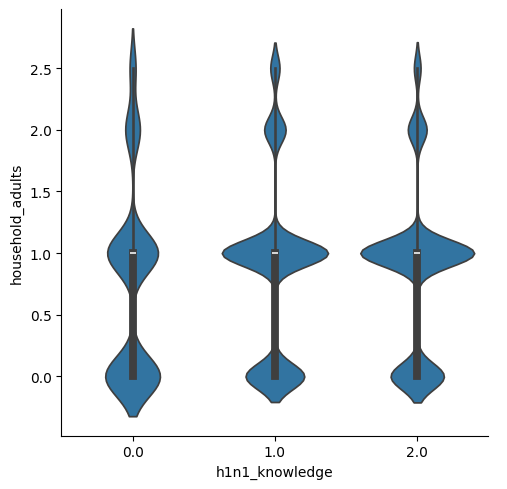

In [65]:
sns.catplot(x="h1n1_knowledge",y="household_adults",data=df,kind="violin")

In [66]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


# Replacing Missing Values

In [67]:
median1=df["h1n1_concern"].median()
median1

2.0

In [68]:
df["h1n1_concern"]=df["h1n1_concern"].replace(np.nan,median1)

In [69]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [70]:
median1=df["h1n1_knowledge"].median()
median1

1.0

In [71]:
df["h1n1_knowledge"]=df["h1n1_knowledge"].replace(np.nan,median1)

In [72]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [73]:
median1=df["behavioral_antiviral_meds"].median()
median1

0.0

In [74]:
df["behavioral_antiviral_meds"]=df["behavioral_antiviral_meds"].replace(np.nan,median1)

In [75]:
median1=df["behavioral_avoidance"].median()
median1

1.0

In [76]:
df["behavioral_avoidance"]=df["behavioral_avoidance"].replace(np.nan,median1)

In [77]:
median1=df["behavioral_face_mask"].median()
median1

0.0

In [78]:
df["behavioral_face_mask"]=df["behavioral_face_mask"].replace(np.nan,median1)

In [79]:
median1=df["behavioral_wash_hands"].median()
median1

1.0

In [80]:
df["behavioral_wash_hands"]=df["behavioral_wash_hands"].replace(np.nan,median1)

In [81]:
median1=df["behavioral_large_gatherings"].median()
median1

0.0

In [82]:
df["behavioral_large_gatherings"]=df["behavioral_large_gatherings"].replace(np.nan,median1)

In [83]:
median1=df["behavioral_outside_home"].median()
median1

0.0

In [84]:
df["behavioral_outside_home"]=df["behavioral_outside_home"].replace(np.nan,median1)

In [85]:
median1=df["behavioral_touch_face"].median()
median1

1.0

In [86]:
df["behavioral_touch_face"]=df["behavioral_touch_face"].replace(np.nan,median1)

In [87]:
median1=df["doctor_recc_h1n1"].median()
median1

0.0

In [88]:
df["doctor_recc_h1n1"]=df["doctor_recc_h1n1"].replace(np.nan,median1)

In [89]:
median1=df["doctor_recc_seasonal"].median()
median1

0.0

In [90]:
df["doctor_recc_seasonal"]=df["doctor_recc_seasonal"].replace(np.nan,median1)

In [91]:
median1=df["chronic_med_condition"].median()
median1

0.0

In [92]:
df["chronic_med_condition"]=df["chronic_med_condition"].replace(np.nan,median1)

In [93]:
median1=df["child_under_6_months"].median()
median1

0.0

In [94]:
df["child_under_6_months"]=df["child_under_6_months"].replace(np.nan,median1)

In [95]:
median1=df["health_worker"].median()
median1

0.0

In [96]:
df["health_worker"]=df["health_worker"].replace(np.nan,median1)

In [97]:
median1=df["health_insurance"].median()
median1

1.0

In [98]:
df["health_insurance"]=df["health_insurance"].replace(np.nan,median1)

In [99]:
median1=df["opinion_h1n1_vacc_effective"].median()
median1

4.0

In [100]:
df["opinion_h1n1_vacc_effective"]=df["opinion_h1n1_vacc_effective"].replace(np.nan,median1)

In [101]:
median1=df["opinion_h1n1_risk"].median()
median1

2.0

In [102]:
df["opinion_h1n1_risk"]=df["opinion_h1n1_risk"].replace(np.nan,median1)

In [103]:
median1=df["opinion_h1n1_sick_from_vacc"].median()
median1

2.0

In [104]:
df["opinion_h1n1_sick_from_vacc"]=df["opinion_h1n1_sick_from_vacc"].replace(np.nan,median1)

In [105]:
median1=df["opinion_seas_sick_from_vacc"].median()
median1

2.0

In [106]:
df["opinion_seas_sick_from_vacc"]=df["opinion_seas_sick_from_vacc"].replace(np.nan,median1)

In [107]:
mode1=df["age_group"].mode()[0]
mode1

'65+ Years'

In [108]:
df["age_group"]=df["age_group"].replace(np.nan,mode1)

In [109]:
median1=df["opinion_seas_vacc_effective"].median()
median1

4.0

In [110]:
df["opinion_seas_vacc_effective"]=df["opinion_seas_vacc_effective"].replace(np.nan,median1)

In [111]:
median1=df["opinion_seas_risk"].median()
median1

2.0

In [112]:
df["opinion_seas_risk"]=df["opinion_seas_risk"].replace(np.nan,median1)

In [113]:
mode1=df["education"].mode()[0]
mode1

'College Graduate'

In [114]:
df["education"]=df["education"].replace(np.nan,mode1)

In [115]:
mode1=df["income_poverty"].mode()[0]
mode1

'<= $75,000, Above Poverty'

In [116]:
df["income_poverty"]=df["income_poverty"].replace(np.nan,mode1)

In [117]:
mode1=df["marital_status"].mode()[0]
mode1

'Married'

In [118]:
df["marital_status"]=df["marital_status"].replace(np.nan,mode1)

In [119]:
mode1=df["rent_or_own"].mode()[0]
mode1

'Own'

In [120]:
df["rent_or_own"]=df["rent_or_own"].replace(np.nan,mode1)

In [121]:
mode1=df["employment_status"].mode()[0]
mode1

'Employed'

In [122]:
df["employment_status"]=df["employment_status"].replace(np.nan,mode1)

In [123]:
median1=df["household_adults"].median()
median1

1.0

In [124]:
df["household_adults"]=df["household_adults"].replace(np.nan,median1)

In [125]:
median1=df["household_children"].median()
median1

0.0

In [126]:
df["household_children"]=df["household_children"].replace(np.nan,median1)

In [127]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [128]:
df.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


# Seaborn

In [129]:
# df=df.drop(["respondent_id","census_msa","employment_status","income_poverty","race","education","h1n1_concern","h1n1_knowledge" ,"behavioral_avoidance","behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings","behavioral_outside_home","behavioral_touch_face","doctor_recc_seasonal","health_worker","marital_status","rent_or_own" ],axis=1)

In [130]:
df.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [131]:
df.shape

(26707, 38)

# Encoding

In [132]:
df.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [133]:
# df=pd.get_dummies(df,columns=["household_adults","household_children","age_group"])

In [134]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [135]:
df.shape

(26707, 38)

In [136]:
df.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [137]:
df = df.drop(['hhs_geo_region','employment_industry','employment_occupation'],axis = 1)

In [138]:
df.to_csv("H1N1_Flu_Vaccines_Cleaned.csv",index=False)